In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [2]:
# Loading your IBM Q account(s)
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-education')
#backend =provider.get_backend('ibmq_qasm_simulator')


# Load local account information
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub=

In [3]:
from qiskit.providers.ibmq import least_busy

remote_Qprocessor = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                   not x.configuration().simulator and x.status().operational==True))

print("Running on current least busy device: ", remote_Qprocessor)

Running on current least busy device:  ibmq_jakarta


In [ ]:
#remote_Qprocessor =provider.get_backend('ibm_lagos')

In [4]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [5]:
circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

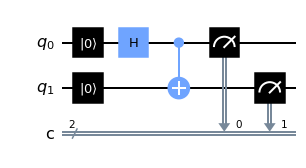

In [6]:
circuit.draw('mpl')

In [ ]:
#shots = 8192
#job = execute(circuit, backend=backend, shots=shots)
#result = job.result()

In [7]:
from qiskit.tools.monitor import job_monitor

# Run with 2048 shots
shots = 2048

t_circuit = transpile(circuit, remote_Qprocessor, optimization_level=3)
job = remote_Qprocessor.run(t_circuit, shots=shots)

# Monitoring our job
job_monitor(job)

Job Status: job has successfully run


In [8]:
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'00': 1011, '01': 54, '10': 60, '11': 923}


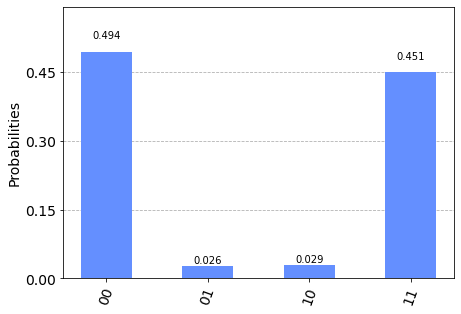

In [9]:
plot_histogram(counts)

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
